In [21]:
import ndjson 
with open('data/raw/full_raw_apple.ndjson') as f:
    data = ndjson.load(f)


In [4]:
# import numpy as np
# npdata = np.load('data/raw/full_numpy_bitmap_apple.npy')

In [20]:
# import matplotlib.pyplot as plt
# indices = np.where(npdata[1].reshape(28,28) )
# indices = np.array(indices).T
# print(indices)
# plt.imshow(npdata[1].reshape(28,28))

In [59]:
# { 
#     "key_id":"5891796615823360",
#     "word":"nose",
#     "countrycode":"AE",
#     "timestamp":"2017-03-01 20:41:36.70725 UTC",
#     "recognized":true,
#     "drawing":[[[129,128,129,129,130,130,131,132,132,133,133,133,133,...]]]
#   }
import numpy as np
import pickle
justDrawings = []
for i, d in enumerate(data):
    justDrawings.append(d['drawing'])
    strokes = []
    minx = 100000
    miny = 100000
    maxx = -100000
    maxy = -100000
    for stroke in d['drawing']:
        stroke = np.array(stroke).T.astype(np.float32)
        maxx = max(np.max(stroke[:,0]), maxx)
        maxy = max(np.max(stroke[:,1]), maxy)
        minx = min(np.min(stroke[:,0]), minx)
        miny = min(np.min(stroke[:,1]), miny)
        strokes.append(stroke)
    
    for i, stroke in enumerate(strokes):
        newstroke = stroke.copy()
        newstroke[:,0] = (stroke[:,0] - minx) / (maxx - minx)
        newstroke[:,1] = (stroke[:,1] - miny) / (maxy - miny)
    
        strokes[i] = newstroke.tolist()
    json.dump(strokes, open('data/processed/apple.json', 'w'))
    # pickle.dump(strokes, open('data/processed/apple.pkl', 'wb'))

    # np.save('data/processed/eiffeltower.npy', strokes)
    # break
    if i == 1:
        break


[[1. 0. 0.]]
[[  1.   0. 185.]
 [  1.   0. 189.]]
[[  1.   0. 221.]
 [  1.   0. 232.]]
[[1.0000000e+00 0.0000000e+00 2.5700000e+02]
 [9.9750000e-01 2.5575447e-03 1.0180000e+03]]
[[5.1249999e-01 2.0204604e-01 5.1950000e+03]
 [4.9750000e-01 1.6624041e-01 5.2160000e+03]
 [4.8249999e-01 1.5345268e-01 5.2580000e+03]
 [4.4499999e-01 1.5601023e-01 5.2840000e+03]
 [3.8999999e-01 1.7647059e-01 5.2990000e+03]
 [3.3000001e-01 2.0460358e-01 5.3150000e+03]
 [2.7000001e-01 2.3785166e-01 5.3330000e+03]
 [2.0500000e-01 2.9156011e-01 5.3510000e+03]
 [1.4500000e-01 3.5549873e-01 5.3660000e+03]
 [8.7499999e-02 4.2710999e-01 5.3830000e+03]
 [3.9999999e-02 5.1150894e-01 5.4000000e+03]
 [1.2500000e-02 6.0102302e-01 5.4170000e+03]
 [0.0000000e+00 6.8797952e-01 5.4330000e+03]
 [0.0000000e+00 7.7749360e-01 5.4500000e+03]
 [2.0000000e-02 8.6700767e-01 5.4670000e+03]
 [5.9999999e-02 9.3350381e-01 5.4840000e+03]
 [1.2250000e-01 9.7953963e-01 5.5010000e+03]
 [1.9499999e-01 1.0000000e+00 5.5160000e+03]
 [2.6750001e

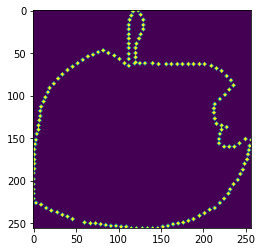

In [57]:
# justDrawings[0]

import numpy as np
import cv2
import matplotlib.pyplot as plt
img = np.zeros((256, 256), dtype = np.uint8)
index = 0
for stroke in strokes:
    stroke = np.array(stroke) 
    stroke[:,0] = stroke[:,0] * 256
    stroke[:,1] = stroke[:,1] * 256
    stroke = stroke.astype(np.int32)
    for i in range(len(stroke)-1):
        # cv2.line(img, (int(stroke[0][i]), int(stroke[1][i])), (int(stroke[0][i+1]), int(stroke[1][i+1])), (255, 255, 255), 2)
        x = int(stroke[i][0])
        y = int(stroke[i][1])
        cv2.circle(img, (x, y), 2, (255, 255, 255), -1)
        # break
plt.imshow(img)
plt.show()

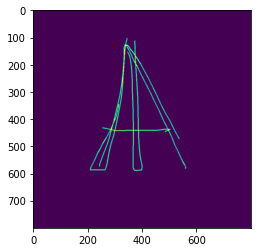